In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/frames/frames.json


In [0]:
df = pd.read_json('../input/frames/frames.json')
df.head()

,user_id,turns,wizard_id,id,labels
0,U22HTHYNP,[{'text': 'I'd like to book a trip to Atlantis...,U21DKG18C,e2c0fc6c-2134-4891-8353-ef16d8412c9a,"{'userSurveyRating': 4.0, 'wizardSurveyTaskSuc..."
1,U21E41CQP,"[{'text': 'Hello, I am looking to book a vacat...",U21DMV0KA,4a3bfa39-2c22-42c8-8694-32b4e34415e9,"{'userSurveyRating': 3.0, 'wizardSurveyTaskSuc..."
2,U21RP4FCY,[{'text': 'Hello there i am looking to go on a...,U21E0179B,6e67ed28-e94c-4fab-96b6-68569a92682f,"{'userSurveyRating': 2.0, 'wizardSurveyTaskSuc..."
3,U22HTHYNP,[{'text': 'Hi I'd like to go to Caprica from B...,U21DKG18C,5ae76e50-5b48-4166-9f6d-67aaabd7bcaa,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc..."
4,U21E41CQP,"[{'text': 'Hello, I am looking to book a trip ...",U21DMV0KA,24603086-bb53-431e-a0d8-1dcc63518ba9,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc..."


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from sklearn.model_selection import train_test_split

import unicodedata
import re
import numpy as np
import os
import io
import time

In [0]:
print (tf.__version__)

2.0.0


In [0]:
df.iloc[0]

user_id                                              U22HTHYNP
turns        [{'text': 'I'd like to book a trip to Atlantis...
wizard_id                                            U21DKG18C
id                        e2c0fc6c-2134-4891-8353-ef16d8412c9a
labels       {'userSurveyRating': 4.0, 'wizardSurveyTaskSuc...
Name: 0, dtype: object

In [0]:
df['chat'] = df['turns'].apply(lambda x: [item['text'] for item in x])
print (df.chat.iloc[0])

["I'd like to book a trip to Atlantis from Caprica on Saturday, August 13, 2016 for 8 adults. I have a tight budget of 1700.", 'Hi...I checked a few options for you, and unfortunately, we do not currently have any trips that meet this criteria.  Would you like to book an alternate travel option?', 'Yes, how about going to Neverland from Caprica on August 13, 2016 for 5 adults. For this trip, my budget would be 1900.', 'I checked the availability for this date and there were no trips available.  Would you like to select some alternate dates?', 'I have no flexibility for dates... but I can leave from Atlantis rather than Caprica. How about that?', 'I checked the availability for that date and there were no trips available.  Would you like to select some alternate dates?', "I suppose I'll speak with my husband to see if we can choose other dates, and then I'll come back to you.Thanks for your help"]


In [0]:
len(df)

1369

In [0]:
a = df.chat.iloc[1]

In [0]:
# seperating all conversations/questions made the user
a[0::2]

['Hello, I am looking to book a vacation from Gotham City to Mos Eisley for $2100.',
 'What about a trip from Gotham City to Neverland for the same budget?',
 'Would any packages to Mos Eisley be available if I increase my budget to $2500?',
 "You know what, I'd like to try and visit Neverland",
 'Do you have any trips from Gotham City to Kobe for my original budget of $2100?',
 "No, that's too far for me. I need a flight that leaves from Birmingham.",
 'How many days would I be in Kobe?',
 'What would the price be if I shortened my trip by one day?',
 'Ok, then I would like to purchase this package. What activities are included in this package?',
 'Yes, I would like to book this package.']

In [0]:
# seperating all the conversations/ answers made by the bot
a[1::2]

["Hi. Sorry, I can't find any trips from Gotham City to Mos Eisley for you.",
 'Sorry, I cannot find any trips leaving from Gotham City. Could you suggest another nearby departure city?',
 'There are no trips available to Mos Eisley.',
 'I cannot find any trips available to Neverland.',
 'I can book you a 3 day trip to Kobe leaving from Sapporo, Japan. Is this ok?',
 'I can book you a trip from Birmingham to Kobe for 2747.8 USD.',
 'You would arrive in Kobe August 17th and return to Birmingham on August 22nd.',
 'I can not find any trips from Birmingham to Kobe for 4 days.',
 'There are no activities listed for this package. You will be staying at the Ivory Legacy Hotel for 7 days. This hotel has a 4.5 star rating and free wifi. Will I go ahead and book this package?',
 'Great. Your flight departs from Birmingham at 9:00 am - Wednesday, August 17th 2016. Enjoy your trip, I have booked this package for you.']

In [0]:
# sample_df of one conversation
pd.set_option('display.max_colwidth',-1)
sample_df = pd.DataFrame(list(zip(a[0::2], a[1::2])),columns = ['user','bot'])
sample_df.head()

,user,bot
0,"Hello, I am looking to book a vacation from Gotham City to Mos Eisley for $2100.","Hi. Sorry, I can't find any trips from Gotham City to Mos Eisley for you."
1,What about a trip from Gotham City to Neverland for the same budget?,"Sorry, I cannot find any trips leaving from Gotham City. Could you suggest another nearby departure city?"
2,Would any packages to Mos Eisley be available if I increase my budget to $2500?,There are no trips available to Mos Eisley.
3,"You know what, I'd like to try and visit Neverland",I cannot find any trips available to Neverland.
4,Do you have any trips from Gotham City to Kobe for my original budget of $2100?,"I can book you a 3 day trip to Kobe leaving from Sapporo, Japan. Is this ok?"


In [0]:
# converting entire converations of the data into dataframe 
df_new = pd.DataFrame(columns=['user','bot'])
temp_u=list()
temp_b = list()
bot = list()
for i in range(len(df.chat)):
    temp_u=list()
    temp_b = list()
    for j in df.chat.iloc[i][0::2]:
        temp_u.append(j)
    for k in df.chat.iloc[i][1::2]:
        temp_b.append(k)
    df_new = df_new.append(pd.DataFrame({'user':pd.Series(temp_u),'bot':pd.Series(temp_b)}), ignore_index = True)
#print (pd.DataFrame({'user':pd.Series(temp_u),'bot':pd.Series(temp_b)}))
print (len(df_new))

10407


In [0]:
df_new.head()

,user,bot
0,"I'd like to book a trip to Atlantis from Caprica on Saturday, August 13, 2016 for 8 adults. I have a tight budget of 1700.","Hi...I checked a few options for you, and unfortunately, we do not currently have any trips that meet this criteria. Would you like to book an alternate travel option?"
1,"Yes, how about going to Neverland from Caprica on August 13, 2016 for 5 adults. For this trip, my budget would be 1900.",I checked the availability for this date and there were no trips available. Would you like to select some alternate dates?
2,I have no flexibility for dates... but I can leave from Atlantis rather than Caprica. How about that?,I checked the availability for that date and there were no trips available. Would you like to select some alternate dates?
3,"I suppose I'll speak with my husband to see if we can choose other dates, and then I'll come back to you.Thanks for your help",NaN
4,"Hello, I am looking to book a vacation from Gotham City to Mos Eisley for $2100.","Hi. Sorry, I can't find any trips from Gotham City to Mos Eisley for you."


In [0]:
df_new.tail()

,user,bot
10402,"5 adults and 7 kids! Yup, the lot of us. We want to spend no more than 32800.",Do you have any date constraints?
10403,Oh yes! Between September 12 and 26!,"In that case, I would like to recommend you our best deal: a 15 day stay at a prestigious 4 star hotel in Queenstown with free breakfast, wifi, and parking during your entire stay. For the whole family it will just be 31122.0."
10404,"That sounds amazing, and it's within those dates? Is that economy class?","Yup it's from the 12th to the 25th, and it will be economy class."
10405,"Ok perfect, book me!",Consider it done! Have a good trip :slightly_smiling_face:
10406,Thanks!,My pleasure!


In [0]:
# lets see rows with "nan"
df_new[df_new.isnull().any(axis=1)].head()


,user,bot
3,"I suppose I'll speak with my husband to see if we can choose other dates, and then I'll come back to you.Thanks for your help",NaN
24,Ahh...maybe another time,NaN
31,Yes I would. Thanks for your help.,NaN
36,Thank you,NaN
44,"Yes please, that sounds wonderful. thank you",NaN


In [0]:
df_new[df_new.isnull().any(axis=1)].tail()


,user,bot
10311,Thank you,NaN
10332,thank you,NaN
10361,Ridiculous,NaN
10370,Thanks!,NaN
10378,Thanks,NaN


In [0]:
# lets work on the NaN data
df_nan = df_new[df_new.isnull().any(axis=1)]

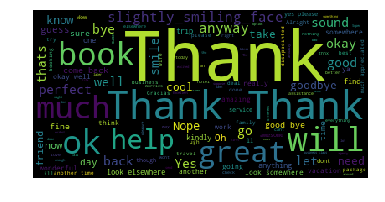

In [0]:
# lets look at the wordcloud to see what were the converstions had with the bot 
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud2 = WordCloud().generate(' '.join(df_nan['user']))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

### since almost all of the words in the user column are conclusions and pleasantries instead of removing this data of 800 rows i'll replace "NaN" with "you are welcome" like an end of a conversation.

In [0]:
# replacing "NaN" in with "you are welcome"
df_nan['bot'].fillna('you are welcome', inplace=True)
df_nan.head()


/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,user,bot
3,"I suppose I'll speak with my husband to see if we can choose other dates, and then I'll come back to you.Thanks for your help",you are welcome
24,Ahh...maybe another time,you are welcome
31,Yes I would. Thanks for your help.,you are welcome
36,Thank you,you are welcome
44,"Yes please, that sounds wonderful. thank you",you are welcome


In [0]:
# now doing the same with the entire data
df_new['bot'].fillna('you are welcome', inplace=True)
df_new.head()


,user,bot
0,"I'd like to book a trip to Atlantis from Caprica on Saturday, August 13, 2016 for 8 adults. I have a tight budget of 1700.","Hi...I checked a few options for you, and unfortunately, we do not currently have any trips that meet this criteria. Would you like to book an alternate travel option?"
1,"Yes, how about going to Neverland from Caprica on August 13, 2016 for 5 adults. For this trip, my budget would be 1900.",I checked the availability for this date and there were no trips available. Would you like to select some alternate dates?
2,I have no flexibility for dates... but I can leave from Atlantis rather than Caprica. How about that?,I checked the availability for that date and there were no trips available. Would you like to select some alternate dates?
3,"I suppose I'll speak with my husband to see if we can choose other dates, and then I'll come back to you.Thanks for your help",you are welcome
4,"Hello, I am looking to book a vacation from Gotham City to Mos Eisley for $2100.","Hi. Sorry, I can't find any trips from Gotham City to Mos Eisley for you."


In [0]:
len(df_new)

10407

In [0]:
def clean_text(text):
    '''Clean text by removing unnecessary characters and altering the format of words.'''

    text = text.lower()
    
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "that is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"how's", "how is", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"n'", "ng", text)
    text = re.sub(r"'bout", "about", text)
    text = re.sub(r"'til", "until", text)
    text = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", text)
    text = " ".join(text.split())
    text = '<start> ' + text + ' <end>'
    return text

In [0]:
# Clean the data
clean_questions = []
for question in df_new['user']:
    clean_questions.append(clean_text(question))
    
clean_answers = []    
for answer in df_new['bot']:
    clean_answers.append(clean_text(answer))

In [0]:
r = np.random.randint(1,len(df_new))
print ('original text......')
for i in range(r, r+3):
    print(df_new.user[i])
    print(df_new.bot[i])
    print()
print ('cleaned text......')
for i in range(r, r+3):
    print(clean_questions[i])
    print(clean_answers[i])
    print()

original text......
Is there anything similar for Punta Cana?
Nope, nothing that works with you budget. Is your budget flexible?

No, it's not. I'm going to have a think about it and decide what I want later.
But thanks for your help!
You're very welcome! Good luck with your search!

Heyaaa
Hi! How can I help you?

cleaned text......
<start> is there anything similar for punta cana <end>
<start> nope nothing that works with you budget is your budget flexible <end>

<start> no it is not i am going to have a think about it and decide what i want later but thanks for your help <end>
<start> you are very welcome good luck with your search <end>

<start> heyaaa <end>
<start> hi how can i help you <end>



In [0]:
max_features = 5000
max_len = 50
def tokenize(x):
    text_tokenizer = tf.keras.preprocessing.text.Tokenizer( num_words = max_features ,filters='')
    text_tokenizer.fit_on_texts(x)
    tensor = text_tokenizer.texts_to_sequences(x)
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor,maxlen = max_len,padding='post')
    return tensor , text_tokenizer

In [0]:
def load_dataset(input_ques, output_ans, num_examples=None):
    input_tensor, input_text_tokenizer = tokenize(input_ques)
    target_tensor, target_text_tokenizer = tokenize(output_ans)

    return input_tensor, target_tensor , input_text_tokenizer,target_text_tokenizer

In [0]:

input_tensor, target_tensor , input_text_tokenizer,target_text_tokenizer= load_dataset(clean_questions,clean_answers)

# Calculate max_length of the target tensors
def max_length(tensor):
    return max(len(t) for t in tensor)
max_length_targ, max_length_inp = max_length(target_tensor), max_length(input_tensor)

In [0]:
# Creating training and validation sets using an 80-20 split
input_tensor_train, input_tensor_val, target_tensor_train, target_tensor_val = train_test_split(input_tensor, target_tensor, test_size=0.2)

# Show length
print(len(input_tensor_train), len(target_tensor_train), len(input_tensor_val), len(target_tensor_val))

8325 8325 2082 2082


In [0]:
BUFFER_SIZE = len(input_tensor_train)
BATCH_SIZE = 64
steps_per_epoch = len(input_tensor_train)//BATCH_SIZE
embedding_dim = 256
units = 1024
vocab_inp_size = len(input_text_tokenizer.word_index)+1
vocab_tar_size = len(target_text_tokenizer.word_index)+1

dataset = tf.data.Dataset.from_tensor_slices((input_tensor_train, target_tensor_train)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)

In [0]:
example_input_batch, example_target_batch = next(iter(dataset))
example_input_batch.shape, example_target_batch.shape

(TensorShape([64, 50]), TensorShape([64, 50]))

In [0]:
# building an enocder with a single gru layer
class Encoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
    super(Encoder, self).__init__()
    self.batch_sz = batch_sz
    self.enc_units = enc_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.enc_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')

  def call(self, x, hidden):
    x = self.embedding(x)
    output, state = self.gru(x, initial_state = hidden)
    return output, state

  def initialize_hidden_state(self):
    return tf.zeros((self.batch_sz, self.enc_units))

In [0]:
encoder = Encoder(vocab_inp_size, embedding_dim, units, BATCH_SIZE)

# sample input
sample_hidden = encoder.initialize_hidden_state()
sample_output, sample_hidden = encoder(example_input_batch, sample_hidden)
print ('Encoder output shape: (batch size, sequence length, units) {}'.format(sample_output.shape))
print ('Encoder Hidden state shape: (batch size, units) {}'.format(sample_hidden.shape))

Encoder output shape: (batch size, sequence length, units) (64, 50, 1024)
Encoder Hidden state shape: (batch size, units) (64, 1024)


In [0]:
# attention layer 
class BahdanauAttention(tf.keras.layers.Layer):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)

  def call(self, query, values):
    # hidden shape == (batch_size, hidden size)
    # hidden_with_time_axis shape == (batch_size, 1, hidden size)
    # we are doing this to perform addition to calculate the score
    hidden_with_time_axis = tf.expand_dims(query, 1)

    # score shape == (batch_size, max_length, 1)
    # we get 1 at the last axis because we are applying score to self.V
    # the shape of the tensor before applying self.V is (batch_size, max_length, units)
    score = self.V(tf.nn.tanh(
        self.W1(values) + self.W2(hidden_with_time_axis)))

    # attention_weights shape == (batch_size, max_length, 1)
    attention_weights = tf.nn.softmax(score, axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * values
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

In [0]:
attention_layer = BahdanauAttention(10)
attention_result, attention_weights = attention_layer(sample_hidden, sample_output)

print("Attention result shape: (batch size, units) {}".format(attention_result.shape))
print("Attention weights shape: (batch_size, sequence_length, 1) {}".format(attention_weights.shape))

Attention result shape: (batch size, units) (64, 1024)
Attention weights shape: (batch_size, sequence_length, 1) (64, 50, 1)


In [0]:
# decoder layer with single gru layer and dense layer
class Decoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz):
    super(Decoder, self).__init__()
    self.batch_sz = batch_sz
    self.dec_units = dec_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.dec_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
    self.fc = tf.keras.layers.Dense(vocab_size)

    # used for attention
    self.attention = BahdanauAttention(self.dec_units)

  def call(self, x, hidden, enc_output):
    # enc_output shape == (batch_size, max_length, hidden_size)
    context_vector, attention_weights = self.attention(hidden, enc_output)

    # x shape after passing through embedding == (batch_size, 1, embedding_dim)
    x = self.embedding(x)

    # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
    x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

    # passing the concatenated vector to the GRU
    output, state = self.gru(x)

    # output shape == (batch_size * 1, hidden_size)
    output = tf.reshape(output, (-1, output.shape[2]))

    # output shape == (batch_size, vocab)
    x = self.fc(output)

    return x, state, attention_weights

In [0]:
decoder = Decoder(vocab_tar_size, embedding_dim, units, BATCH_SIZE)

sample_decoder_output, _, _ = decoder(tf.random.uniform((64, 1)),
                                      sample_hidden, sample_output)

print ('Decoder output shape: (batch_size, vocab size) {}'.format(sample_decoder_output.shape))

Decoder output shape: (batch_size, vocab size) (64, 4921)


In [0]:
# optimizer = adam and loss = sparsecategorical crossentropy
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_mean(loss_)

In [0]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=decoder)

In [0]:
@tf.function
def train_step(inp, targ, enc_hidden):
  loss = 0

  with tf.GradientTape() as tape:
    enc_output, enc_hidden = encoder(inp, enc_hidden)

    dec_hidden = enc_hidden

    dec_input = tf.expand_dims([target_text_tokenizer.word_index['<start>']] * BATCH_SIZE, 1)

    # Teacher forcing - feeding the target as the next input
    for t in range(1, targ.shape[1]):
      # passing enc_output to the decoder
      predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)

      loss += loss_function(targ[:, t], predictions)

      # using teacher forcing
      dec_input = tf.expand_dims(targ[:, t], 1)

  batch_loss = (loss / int(targ.shape[1]))

  variables = encoder.trainable_variables + decoder.trainable_variables

  gradients = tape.gradient(loss, variables)

  optimizer.apply_gradients(zip(gradients, variables))

  return batch_loss

In [0]:
EPOCHS = 25

for epoch in range(EPOCHS):
  start = time.time()

  enc_hidden = encoder.initialize_hidden_state()
  total_loss = 0

  for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
    batch_loss = train_step(inp, targ, enc_hidden)
    total_loss += batch_loss

    if batch % 100 == 0:
        print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                     batch,
                                                     batch_loss.numpy()))
  # saving (checkpoint) the model every 2 epochs
  if (epoch + 1) % 2 == 0:
    checkpoint.save(file_prefix = checkpoint_prefix)

  print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                      total_loss / steps_per_epoch))
  print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 2.8559
Epoch 1 Batch 100 Loss 1.4243
Epoch 1 Loss 1.6133
Time taken for 1 epoch 135.87253093719482 sec

Epoch 2 Batch 0 Loss 1.1578
Epoch 2 Batch 100 Loss 1.0088
Epoch 2 Loss 1.1998
Time taken for 1 epoch 45.42839598655701 sec

Epoch 3 Batch 0 Loss 1.1716
Epoch 3 Batch 100 Loss 1.1786
Epoch 3 Loss 1.0460
Time taken for 1 epoch 45.09636974334717 sec

Epoch 4 Batch 0 Loss 0.8880
Epoch 4 Batch 100 Loss 0.8422
Epoch 4 Loss 0.9640
Time taken for 1 epoch 45.34975218772888 sec

Epoch 5 Batch 0 Loss 0.7907
Epoch 5 Batch 100 Loss 0.5977
Epoch 5 Loss 0.9069
Time taken for 1 epoch 45.063127279281616 sec

Epoch 6 Batch 0 Loss 1.0154
Epoch 6 Batch 100 Loss 0.8799
Epoch 6 Loss 0.8595
Time taken for 1 epoch 45.16994118690491 sec

Epoch 7 Batch 0 Loss 0.7032
Epoch 7 Batch 100 Loss 0.9435
Epoch 7 Loss 0.8200
Time taken for 1 epoch 44.93377232551575 sec

Epoch 8 Batch 0 Loss 0.7308
Epoch 8 Batch 100 Loss 0.8409
Epoch 8 Loss 0.7867
Time taken for 1 epoch 45.40943217277527 sec

Epoch 

In [0]:
def evaluate(sentence):
  

    sentence = clean_text(sentence)

    inputs = [input_text_tokenizer.word_index[i] for i in sentence.split(' ')]
    inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs],
                                                           maxlen=max_length_inp,
                                                           padding='post')
    inputs = tf.convert_to_tensor(inputs)

    result = ''

    hidden = [tf.zeros((1, units))]
    enc_out, enc_hidden = encoder(inputs, hidden)

    dec_hidden = enc_hidden
    dec_input = tf.expand_dims([target_text_tokenizer.word_index['<start>']], 0)

    for t in range(max_length_targ):
        predictions, dec_hidden, attention_weights = decoder(dec_input,
                                                             dec_hidden,
                                                             enc_out)


        predicted_id = tf.argmax(predictions[0]).numpy()

        result += target_text_tokenizer.index_word[predicted_id] + ' '

        if target_text_tokenizer.index_word[predicted_id] == '<end>':
            return result, sentence 

        # the predicted ID is fed back into the model
        dec_input = tf.expand_dims([predicted_id], 0)

    return result, sentence 

In [0]:
def query(sentence):
    result, sentence = evaluate(sentence)

    print('Input: %s' % (sentence))
    print('Predicted response: {}'.format(result))

    

In [0]:
query('hi')

Input: <start> hi <end>
Predicted response: hello <end> 


In [0]:
query('i want to travel , book a ticket')

Input: <start> i want to travel book a ticket <end>
Predicted response: where will you be going on your own <end> 


In [0]:
query('are any hotels available')

Input: <start> i want to leave today <end>
Predicted response: i have no flights operating out of kabul is there somewhere else you would like to leave from <end> 


In [0]:
query('book a ticket')

Input: <start> book a ticket <end>
Predicted response: sure thing where would you like to go for <end> 


In [0]:
query('thank you')

Input: <start> thank you <end>
Predicted response: you are welcome <end> 


i guess the bot can make a sense of the query by the user and gives sort of appropriate response